## Object Detection - Edges

Edges are a little more robust when trying to detect an object in an image. The entity that we're trying to detect doesn't have to be exactly the same on the main image. Even with some superficial changes, our algorithm can detect the image fairly well.

The distinct idea from vanilla correlation is that we'll use the edge maps instead of using the images directly to perform normalized cross correlation on the main image.

An edge indicates the boundary between important features of an image. With edges, we can not only detect objects in an image but segment images and understand the scene.

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
main_img = cv2.imread("./images/main.png")
main_img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)

waldo_img = cv2.imread("./images/waldo.png")
waldo_img = cv2.cvtColor(waldo_img, cv2.COLOR_BGR2RGB)

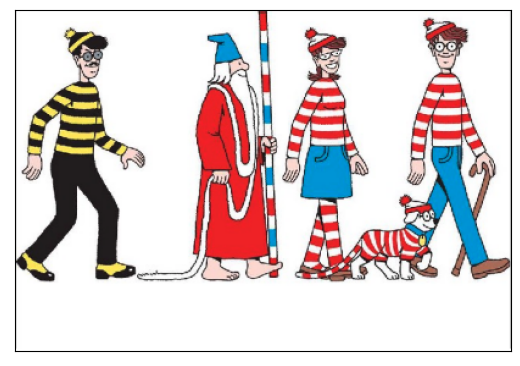

In [33]:
plt.xticks([]), plt.yticks([])
plt.imshow(main_img)

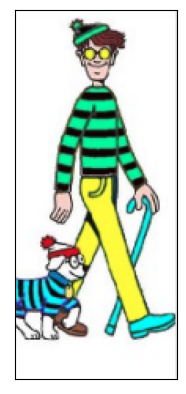

In [34]:
plt.xticks([]), plt.yticks([])
plt.imshow(waldo_img)

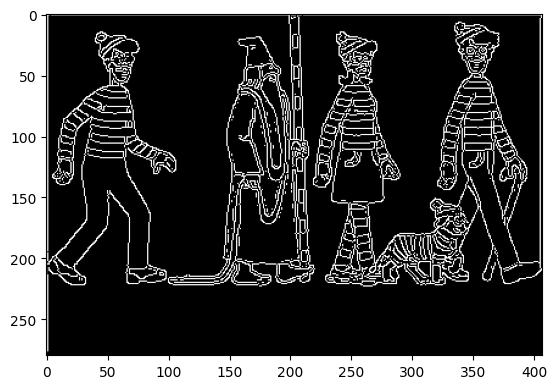

In [35]:
max_threshold = 500
min_threshold = 200

# edge map of the main image
main_edge = cv2.Canny(main_img, threshold1=min_threshold, threshold2=max_threshold)
plt.imshow(main_edge, cmap="gray")

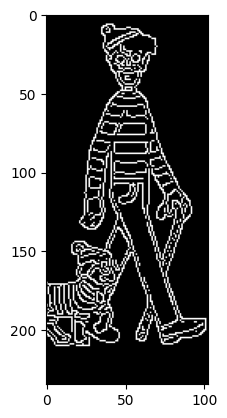

In [36]:
# edge map of waldo's image

waldo_edge = cv2.Canny(waldo_img, threshold1=min_threshold, threshold2=max_threshold)
plt.imshow(waldo_edge, cmap='gray')

0.22623422741889954 (300, 5)


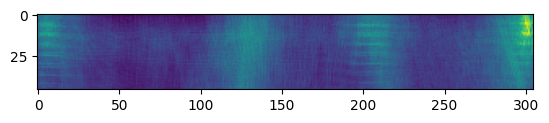

In [37]:
# comparing the edge maps with cross correlation
detection = cv2.matchTemplate(main_edge, waldo_edge, method=cv2.TM_CCOEFF_NORMED)

_, max_val, _, max_loc = cv2.minMaxLoc(detection)
print(max_val, max_loc)

plt.imshow(detection)

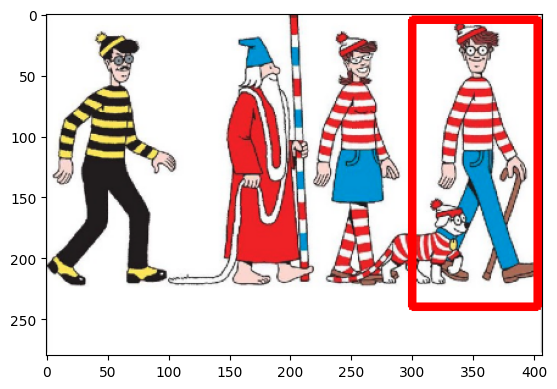

In [38]:
# Creating a rectangle around waldo
corner1, corner2 = max_loc, (max_loc[0] + waldo_img.shape[1], max_loc[1] + waldo_img.shape[0])
rectangle_img = cv2.rectangle(main_img, corner1, corner2, (255, 0, 0), 5)

plt.imshow(rectangle_img)

### Different ways to get edges of an image

#### Laplacian of Image

Taking the Laplacian of the image helps in getting derivatives along the pixel intensities. A second order derivative is preferred to a first order one because it captures both the second and first order derivatives. It is also more resilient to noise and better at just picking up the edges of the image.

In [39]:
# using main image and getting its laplacian

waldo_img_edge = cv2.cvtColor(waldo_img, cv2.COLOR_BGR2GRAY)

laplacian_blur_3 = cv2.Laplacian(waldo_img_edge, ddepth=cv2.CV_64F, ksize=3) # blurring with kernel size 3 to supress noise
laplacian_blur_7 = cv2.Laplacian(waldo_img_edge, ddepth=cv2.CV_64F, ksize=7) # blurring with kernel size 7 to supress noise
laplacian = cv2.Laplacian(waldo_img_edge, ddepth=cv2.CV_64F)

# the datatype of laplacian is float64 to caputure the derivate going from black to white (positive derivative) and white to black (negative derivative).
# Once the derivate is calculated in float64, it can be changed to uint8 and absolute value has to be taken
laplacian_blur_3 = np.uint(np.absolute(laplacian_blur_3))
laplacian_blur_7 = np.uint(np.absolute(laplacian_blur_7))
laplacian = np.uint(np.absolute(laplacian))

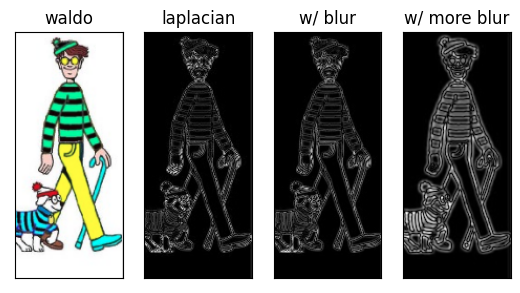

In [40]:
titles = ['waldo', 'laplacian', 'w/ blur', 'w/ more blur']
images = [waldo_img, laplacian, laplacian_blur_3, laplacian_blur_7]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.xticks([]), plt.yticks([])
    plt.title(titles[i])
    plt.imshow(images[i], cmap="gray")

#### Convolving with a Sobel Operator

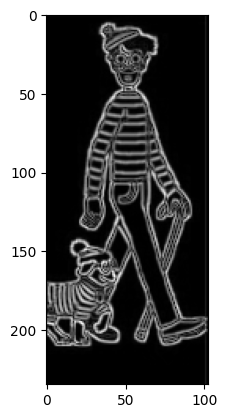

In [56]:
waldo_sobel = cv2.cvtColor(waldo_img, cv2.COLOR_BGR2GRAY)

# getting gradients in x and y directions
grad_x = cv2.Sobel(waldo_sobel, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(waldo_sobel, cv2.CV_64F, 0, 1, ksize=3)

abs_grad_x = abs(grad_x)
abs_grad_y = abs(grad_y)

final_image = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(final_image, cmap='gray')